# Support Vector Machine (SVM)
SVM à marge dure
## 1 Formulation mathématique
---
### 1.1 Enonciation du problème
#### 1.1.1 Définition des paramètres d'entrée (dataset)

On considère, comme pour les autres modèles déjà mentionnés précédment, un dataset $S$ de taille $N$ tel que : 

$$
S = \{ (X_{1}, y_{1}), \dots, (X_{N}, y_{N}) \}, \quad \forall x_{i}, y_{i} \in \mathcal{X} \times \mathcal{Y}
$$

avec : 

1. $(X_{i})_{i \in \mathbb{N}^{*}} =  ((x_{1,i}, \dots, x_{m,i} ))_{i, m \in \mathbb{N}^{*}} \in \mathbb{R}^{m} = \mathcal{X}, \quad \forall x_{m, i} \in \mathbb{R}$ l'échantillon de $m$ features associé à l'élément $y_{i}$ de la classe -1 ou 1. 
2. $\mathcal{X}$ : l'ensemble des observations, ou ensemble des entrées.
3. $\mathcal{Y}$ : l'ensemble des sorties.

On peut le voir d'une autre manière, à savoir :

$$
S = (y, X)
$$

avec : 

$$
X =  
   \begin{bmatrix}
    x_{1,1} & \dots & x_{1,n} \\
    \vdots & x_{i,n} & \vdots \\
    x_{n,1} & \dots & x_{n,n} \\
   \end{bmatrix} \in \mathcal{M}_{N,m}, \quad
   Y = 
    \begin{bmatrix}
    y_{1}  \\
    \vdots \\
    y_{N}  \\
   \end{bmatrix} \in \mathbb{R}^{N}
$$

#### 1.1.2 Problématique
Le modèle SVM, ou *Support Vector Machine* est un modèle d'apprentissage supervisé qui permet d'identifer un séparateur entre deux classes. En d'autres termes, le problème revient à chosir un séparateur adapté qui sépare deux classes. En ce sens, qu'est-ce qu'un séparateur ? Considérons un ensemble de vecteurs $v_{i} \in \mathbb{R}^{n}$ séparés en deux groupes, i.e. en deux classes. Les deux classes peuvent êtres labelisées en tant que "groupe 1" et "groupe 2" ou tout simplement peuvent prendre les valeurs $-1$ ou $1$ de telle sorte que l'ensemble des sorties, $\mathcal{Y}$, s'exprime sous la forme : 

$$
\mathcal{Y} = \{-1;1\}
$$

soit : 

$$
y_{i} \in \mathcal{Y} = \{-1;1\}
$$

**Le séparateur linéaire est donc l'hyperplan dans $\mathbb{R}^{n}$ qui s'exprime sous la forme suivante :**

$$
w^Tx + b = 0
$$

tel que : 

$$
\left\{
\begin{eqnarray}
w^{T}x_{i} + b > 1 \quad \text{si} \qquad y_i = 1\\
w^{T}x_{i} + b > -1 \quad \text{si} \qquad y_i = -1\\
\end{eqnarray}
\right.
$$

avec : 

1. $w \in \mathbb{R}^{n}$ : vecteur des poids, ce sont les hyperparamètres à optimiser dans le modèle 

Les prédictions du modèle deviennent : 

$$
\hat{y_{i}} = \text{sign}({w^{T}x_{i} + b})
$$

En prenant $\mathcal{X} = \mathbb{R}$, on peut représenter le plan qui sépare les deux classes : 

<div align="center">
  <img src="src/pics/SVM/SVM.webp" alt="a" width="750" height="500">
</div>


**La marge, i.e. la distance entre les ploints les plus rapprochés du plan pour chaque classe est égale à $\frac{2}{||w||}$. On cherche à maximiser la marge entre les deux points les plus rapprochés du plan pour chaque classe (les vecteurs supports), c'est à dire trouver :**

$$
max(\text{marge}) = \max_{w, b} \frac{2}{||w||}
$$

Maximiser $\frac{2}{||w||}$ revient à minimiser $||w||$ ou bien $||w||²$. On se ramène donc à un **problème d'optimisation convexe** tel que : 

$$
\max_{w, b} \frac{2}{||w||} = \min_{w, b} \frac{1}{2}||w||²
$$

sous contraintes : 

$$
y_{i}(w^{T}x_{i} + b) > 1, \quad \forall i \in \mathbb{N}^{*}
$$

#### 1.2 Résolution du problème d'optimisation convexe sous contraintes

On cherche alors à trouver les valeurs des poids du vecteur $w$ à l'aide d'algorithmes d'optimisation convexe. Ces algorithmes incluent : 

##### 1.2.1 Résolution exacte par des algorithmes dits QP (quadratic Programming) pour la résolution du problème dual comme
* Le gradient projetté
* La métode des multiplicateurs de Lagrange (KKT)
* La méthode de Newton
  
qui sont des algorithmes coûteux $\mathcal{O}(n³)$. Pour des gros datasets, on préfère utiliser les méthodes itératives.

##### 1.2.2 Méthodes itératives 
* Sequential Minimal optimization (SMO)
* Sochastic Gradient Descent (SGD)
* Coordinate descent

La librairie Sscikit-learn utilise les KKT et SMO. Pour aller plus loin, voir 0.3.Convex_Problems_Algorithms.ipynb

#### 1.3 Evaluation des performances du modèle - métriques

Pour les modèles de classification (SVM, C-SVC, $\nu$-SVC) :

##### 1.3.1 Accuracy score

L'accuracy score mesure la proportion de prédictions correctes, c'est-à-dire la quantité de classes prédites correctement.  

$$
\text{AC-score} = \frac{1}{n}\sum_{i=1}^{n}\mathbb{1}(\hat{y_{i}} = y_{i})
$$

Avec : 

* $\mathbb{1}(\bullet)$ : fonction indicatrice. $\mathbb{1}_{\mathcal{A}}(x) = 1$ si $x \mathcal{A}$, $0$ sinon. Plus généralement : $\mathbb{1}(\bullet) = 1$ si la condition est respectée, $0$ sinon.
* $\hat{y_{i}}$ : estimateur de $y_{i}$ en utilisant la méthode d'estimation présentée dans la partie 1.1.2. Autrement dit, $\hat{y_{i}} = \text{sign}({w^{T}x_{i} + b})$ ou $\text{sign}$ désigne la fonction signe.

##### 1.3.2 Précision

$$
\text{presion} = \frac{TP}{TP + FP} 
$$

##### 1.3.3 Rappel

$$
\text{recall} = \frac{TP}{TP + FN} 
$$

##### 1.3.4 F-1 Score

$$
\text{F1-score} = \frac{precision \times recall}{precision + recall}
$$

Avec : 

* FP : faux positifs
* TP : vrai positif
* FN : faux négatif
* TN : vrai négatifs

##### 1.3.5 Matrice de confusion

$$
\text{confusion matrix} = 
\begin{bmatrix} 
    TP & FP \\
    FN & TN
\end{bmatrix} 
$$

##### 1.3.6 ROC-AUC

$$

$$


##### 1.3.7 Marge moyenne

Pour les problèmes de régression (SVR, $\epsilon$-SVR, $\nu$-SVR) :

#####

#### 1.4 Illustration de l'entraînement d'un SVM

<div align="center">
  <img src="src/pics/SVM/svm_training.gif" alt="a" width="600" height="300">
</div>

## 2 Des exemples en Python
---
#### 2.1 Import des librairies

In [1]:
# Maths
import numpy as np

# Graphs
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# Dataset
from sklearn.datasets import load_iris

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Trainning
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Metrics
from sklearn.metrics import accuracy_score

# Load / import models
from joblib import dump, load

#### 2.2 Import du dataset

Ici, on travialle avec le dataset iris, disponible dans la librairie scikit-learn.

In [2]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

df["species"] = iris.target
species_names = iris.target_names
df['species'] = df['species'].apply(lambda x: species_names[x])

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Etant donné que le SVM est un modèle de classification, on se propose de prédire l'espèce de la fleur en fonction de la taille de son sépal et de ses pétales. La variable cible est donc "**species**".

In [3]:
target = "species"
X = df.drop(target, axis=1)
y = df[target]

In [4]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

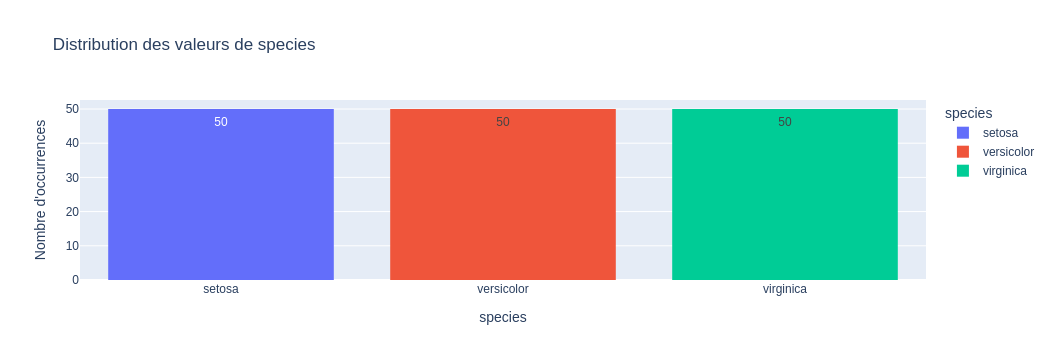

In [6]:
fig = px.histogram(
    df,
    x=target,           
    title=f"Distribution des valeurs de {target}",
    color=target,       
    text_auto=True      
)
fig.update_layout(
    xaxis_title=target,
    yaxis_title="Nombre d'occurrences",
    bargap=0.2
)
fig.show()

Ici, pas de problème d'équilibrage de classes dans les espèces, on peut continuer.

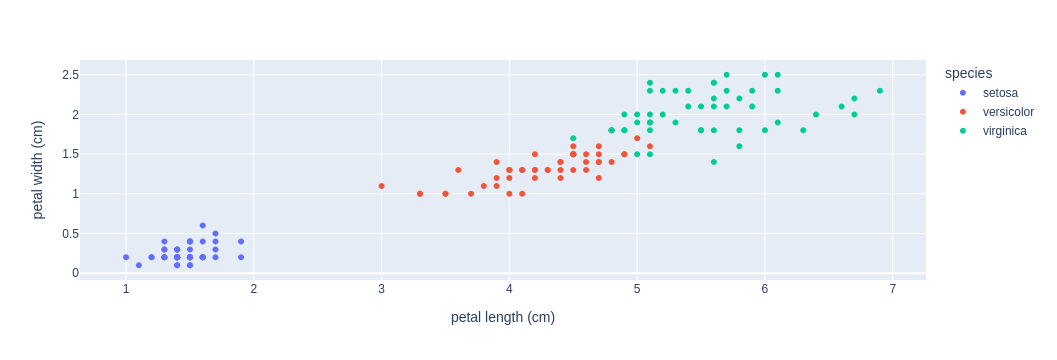

In [7]:
px.scatter(
    df,
    x="petal length (cm)",
    y="petal width (cm)",
    color="species"
)

Si on s'en tient à la figure 1, on remarque, en prenant uniquement deux features du dataset, qu'il y a bien 3 groupes de points bien distinct (i.e. 3 espèces différentes). Si on reprend les 4 features de $X$ qui nous permettent de prédire l'espèce, on cherchera donc à trouver les hyperplans qui permettent de séparer ces différentes espèces.

#### 2.3 Séparation $X_{train}$, $X_{test}$

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### 2.4 Normalisation des données

In [9]:
scaler = StandardScaler() # Initialisation du modèle de scaling

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### 2.5 Entraînement du modèle

Le modèle SVM avec les hyperpramètres de base est en réalité un C-SVC (voir partie 2 - C-Support Vector Classification (C-SVC)) avec les paramètres suivants :

* C $\longrightarrow \infty$
* kernel : linéaire
* $\gamma$ : auto

In [10]:
svc = SVC(verbose=True)    # Initialisation du modèle
svc.fit(X_train,y_train)   # Entraînement du modèle

[LibSVM]*
optimization finished, #iter = 31
obj = -3.555354, rho = -0.019597
nSV = 10, nBSV = 2
*
optimization finished, #iter = 36
obj = -2.999200, rho = 0.131121
nSV = 12, nBSV = 1
*
optimization finished, #iter = 51
obj = -21.684437, rho = -0.102790
nSV = 36, nBSV = 27
Total nSV = 47


,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,True


#### 2.6 Prédicitons du modèle

In [11]:
y_pred = svc.predict(X_test) # Prédicitons sur les données de test

#### 2.7 Métriques

In [12]:
accuracy_score(y_test, y_pred)

1.0

On a un accuracy score de 1, ce qui est indicateur d'overfitting. Or, d'apères le nuage de points qui trace la largeur des pétales en fonction de la longueur des pétales, on constate que les classes sont entièrement séparables. On se propose alors de générer plusieurs seeds du dataset lors du *random sampling* (i.e. le tirage aléatoire des échantillons de train et de test) pour savoir si c'est bien un cas d'overfitting ou si le modèle arrive à  séparer parfaitement les classes avec les données disponibles.

In [13]:
accuracies = []
for seed in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    svc = SVC()
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

accuracies

[1.0,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 0.9333333333333333,
 0.9333333333333333,
 0.9666666666666667,
 0.8666666666666667,
 0.9333333333333333,
 1.0]

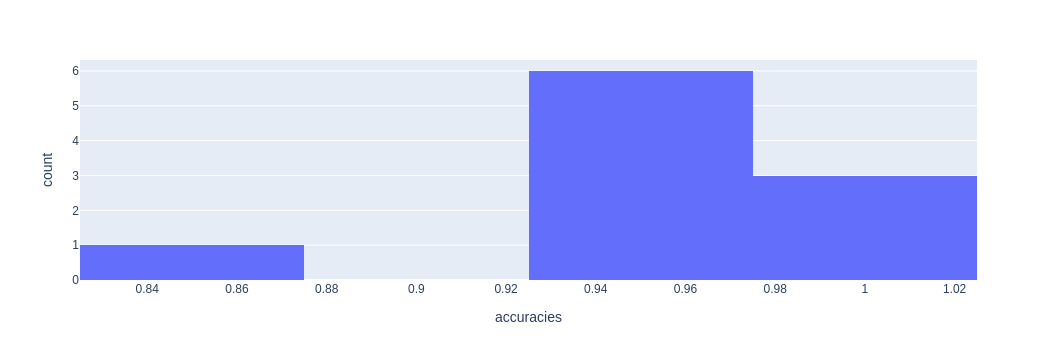

In [14]:
df_acc = pd.DataFrame({"accuracies" : accuracies})

px.histogram(df_acc, x="accuracies")

In [15]:
float("{:.3f}".format(sum(accuracies)/len(accuracies)))

0.957

On constate qu'en fonction du *random sampling*, l'accuracy score n'est pas le même. En moyenne, on tombe à un accuracy score de 9.97, qui reste un très bon score mais plus cohérent. Ce n'est donc pas un cas d'overfitting mais bien du fait que le dataset proposé est très simple et le modèle arrive à séparer les classes correctement. 

#### 2.8 Déploiement du modèle

Enregistrement du modèle

In [16]:
dump(svc, 'SVM.joblib') # Enregistrement du modèle

['SVM.joblib']

Import du modèle 

In [17]:
model = load('SVM.joblib') # Recharge du modèle

On vérifie que le modèle marche bien

In [18]:
x = np.array([4.0, 3.0, 1.0, 0.5]).reshape(1, -1) # Nouvel échantillon inconnu
y_pred = model.predict(x) # Prédiction sur l'échantillon
y_pred[0]

'virginica'

---
## C-Support Vector Classification (C-SVC)
SVM à marge souple
### 1.1 Enonciation du problème :

On reprend le modèle SVM classique. On cherche donc un hyperplan $w^Tx + b = 0$ tel que les deux classes $y_{i} \in \{-1;1\}$ soient le mieux séparées possible. Dans ce cas, **les classes ne sont pas séparables** et on s'autorise une erreur sur les points tout en esseyant de maximiser la marge (SVM à marge souple). Le problème d'optimisation convexe contient alors la combinaison linéaires entre la norme du vecteur de poids $w$ et un terme d'erreur (violation de la marge). Le problème primal d'optimisation sous contraintes $(\mathcal{P})$ est alors :

$$
\min_{w,b, \xi_i}{\frac{1}{2}||w||² + C\sum_{i=1}^{n}\xi_{i}}
$$

sous contraines :

$$
\left\{
\begin{eqnarray}
y_{i}(w^{T}x_{i} + b) > 1 - \xi_{i} \\
\xi_{i} >= 0 \\
\end{eqnarray}
\right.
$$

On a alors l'interprétation suivante : 

* $y_{i}(w^{T}x_{i} + b) > 1 \quad \text{pas d'erreur de classification}$
* $0 < y_{i}(w^{T}x_{i} + b) < 1 \quad \text{terme d'erreur : le point est dans la marge}$
* $y_{i}(w^{T}x_{i} + b) < 0 \quad \text{erreur forte : le point est dans la mauvaise classe}$


Avec : 

* $\xi_{i}$ : les écarts des points par rapport à la marge (variables d'écarts, ou stack variables)
* $C > 0$ : c'est l'hyperparamètre qui quantifie la tolérance à l'erreur des points qui dépassent la marge. Plus $C$ est grand, plus on a un risque d'overfitting. Plus $C$ est proche de 0, plus on autorise d'erreurs sur les points.

### 1.2 Problème dual

$C$ est un paramètre qui dépend de l'échelle des données et se règle de manière empirique (avec un grid search généralement). Le réglage de $C$ de manière automatique se fait alors à l'aide d'une variante du $C-SVC$, la $\nu-SVC$ (voir la partie associée).
Il arrive parfois que la séparation entre les points ne soit pas linéaire. Pour résoudre ce problème, on introduit la forme duale du problème $(\mathcal{P}^\dagger)$; en découle la notion de noyau :

$$
\max_{\alpha_{i}} ( \sum_{i=1}^{n} \alpha_{i} - \frac{1}{2}\sum_{i,j=1}^{n} \alpha_{i}\alpha_{j}y_{i}y_{j}K(x_{i},x_{j}))
$$

Avec : 

1. $\alpha_i$ : les nouveaux hyperparamètres qui permettent de projetter le problème en dimension plus grande
2. $K$ : le noyau du modèle

Le problème d'optimisation convexe dual $(\mathcal{P}^\dagger)$ est mathématiquement équivalent à $(\mathcal{P})$ mais permet de résoudre le problème initial en plus grande dimension, ce qui permet notament d'utiliser la méthode du *kernel trick*. Le *kernel trick* permet de séparer les classes linéairement en plus grande dimension afin de créer une séparation non-linéaire en projettant à nouveau dans la dimension initiale. Voici un exemple du *kernel trick* (projection d'un espace non séparable linéairement en dimension 2 mais séparable linéairement en dimension 3)

<div align="center">
  <img src="src/pics/SVM/kerneltrick.png" alt="a" width="750" height="500">
</div>

### 1.3 Justification de l'utilisation du problème dual

Un problème d'optimisation (avec ou sans  contraintes) peut se résoudre à l'aide du Lagrangien de la fonction à minimiser. Cette méthode permet d'introduire des coefficients $\alpha_i \in \mathbb{R}$ qui permettent de travailler en plus grande dimension et permettent de minimiser la fonction à l'aide des $\alpha_i$ sans calculer explicitement $w$. Par exemple, si on reprend le problème primal $(\mathcal{P})$ :

$$
\min_{w,b, \xi_i}{\frac{1}{2}||w||² + C\sum_{i=1}^{n}\xi_{i}}
$$

sous contraines :

$$
\left\{
\begin{eqnarray}
y_{i}(w^{T}x_{i} + b) > 1 - \xi_{i} \\
\xi_{i} >= 0 \\
\end{eqnarray}
\right.
$$  

Pour obtenir le problème dual de $(\mathcal{P})$, $(\mathcal{P}^\dagger)$ :
1. On calcule le Lagrangien de la fonction à minimiser : 

$$
L(w, b, \xi, \alpha) = \frac{1}{2}||w||² + C\sum_{i=1}^{n}\xi_{i} - \sum_{i=1}^{n} \alpha_{i}[ y_{i}(w^{T}x_{i} + b) - 1 + \xi_{i}] - \sum_{i=1}^{n}\mu_{i} \xi_{i}
$$

2. Les conditions d'optimalité (KKT) sont trouvées en appliquant le gradient au Lagrangien :

$$
\frac{\partial L}{\partial w}(w, b, \xi, \alpha) = 0 \iff w - \sum_{i=1}^{n} \alpha_{i}y_{i}x_{i} = 0 \iff w = \sum_{i=1}^{n} \alpha_{i}y_{i}x_{i}
$$

$$
\frac{\partial L}{\partial b}(w, b, \xi, \alpha) = 0 \iff  - \sum_{i=1}^{n} \alpha_{i}y_{i} = 0 \iff \sum_{i=1}^{n} \alpha_{i}y_{i} = 0
$$

$$
\frac{\partial L}{\partial \xi_i}(w, b, \xi_i, \alpha) = 0 \iff C - \alpha_{i} - \mu_{i} = 0 \iff \alpha_i <= C \quad \text{car} \quad \mu_i = C - \alpha_i
$$

3. Puis on minimise par rapport à $b$ et aux vecteurs $w$ et $\xi$. On maximise par rapport aux coefficients du vecteur $\alpha$ de telle sorte à chercher l'expression de : 

$$
\max_{\alpha}\min_{w,b, \xi}(L(w, b, \xi, \alpha))
$$

En fonction des $\alpha_i$ uniquement. En remplaçant les expressions de $w$ et $b$ trouvés à l'étape 2, le problème dual de $(\mathcal{P})$ revient alors à :

$$
\max_{\alpha_{i}} ( \sum_{i=1}^{n} \alpha_{i} - \frac{1}{2}\sum_{i,j=1}^{n} \alpha_{i}\alpha_{j}y_{i}y_{j}(x_{i}^{T}x_{j}))
$$

ou bien, avec l'expression du noyau $K$ :

$$
\max_{\alpha_{i}} ( \sum_{i=1}^{n} \alpha_{i} - \frac{1}{2}\sum_{i,j=1}^{n} \alpha_{i}\alpha_{j}y_{i}y_{j}K(x_{i},x_{j}))
$$

sous contraintes (trouvés à l'aide de la dernière expression de l'étape 2) : 

$$
\left\{
\begin{eqnarray}
0 <= \alpha_1 <= C \\
\sum_{i=1}^{n} \alpha_{i}y_{i} = 0 \\
\end{eqnarray}
\right.
$$  

Ici, on a un noyau linéaire, à savoir $K(x_{i},x_{j}) = x_{i}^{T}x_{j}$. Pour une séparation non-linéaire, on peut prendre un autre noyau. $K$ a la forme générale suivante : 

$$
K(x_{i},x_{j}) = \phi(x_{i})^{T} \phi(x_{j})
$$

avec $\phi$ une fonction non-linéaire. La fonction de décision finale est de la forme : 

$$
f(x) = \text{sign}( \sum_{i=1}^{n} \alpha_{i}y_{i}K(x_{i},x_{j}) + b)
$$

### 1.4 Liste des noyaux usuels

| Type de noyau | Formule | Interprétation / propriétés |
|----------------|----------|-----------------------------|
| **1️ Linéaire** | $ K(x_i, x_j) = x_i^T x_j $ | SVM sans mappage (kernel de base). Temps d'exécution rapide. |
| **2️ Polynomial** | $ K(x_i, x_j) = (\gamma x_i^T x_j + r)^d $ | Permet de séparer les classes avec une frontière "courbée". |
| **3️ RBF (Radial Basis Function) / Gaussien** | $ K(x_i, x_j) = \exp(-\gamma \|x_i - x_j\|^2) $ | Séparation des classes dans un espace de dimension infinie. Frontières de formes diverses |
| **4️ Sigmoïde** | $ K(x_i, x_j) = \tanh(\gamma x_i^T x_j + r) $ | Séparation en forme de sigmoïde |
| **5️ Noyau de Laplace** | $ K(x_i, x_j) = \exp(-\gamma \|x_i - x_j\|_1) $ | Variante du RBF, plus robuste aux outliers en utilisant la norme $\mathcal{l}_1$. |
| **6️ Noyau de spline / B-spline** | Fonctions polynomiales continues par morceaux | Approprié pour les données continues avec lissage. |
| **7️ Noyau de similarité spécifique** | - | Utilisé en traitement du language naturel |

### 1.5 Exemples de C-SVC avec différentes valeurs de $C$ pour différents kernels :

Voici quelques exemples de séparation linéaire avec la $C-SVC$ en faisant varier $C$ de manière empirique en fonction des différents kernels :

<div align="center">
  <img src="src/pics/SVM/svm_c_variation.gif" alt="a" width="750" height="500">
</div>


## 2 Des exemples en Python
---
#### 2.1 Import des librairies

In [19]:
# Maths
import numpy as np

# Graphs
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# Dataset
from sklearn.datasets import load_iris

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Trainning
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Metrics
from sklearn.metrics import accuracy_score

# Load / import models
from joblib import dump, load

#### 2.2 Import du dataset
On reprend le jeu de données iris de la première partie 

In [20]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

df["species"] = iris.target
species_names = iris.target_names
df['species'] = df['species'].apply(lambda x: species_names[x])

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [21]:
target = "species"
X = df.drop(target, axis=1)
y = df[target]

In [22]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [23]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

#### 2.3 Séparation $X_{train}, $X_{test}

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### 2.4 Normalisation

In [25]:
scaler = StandardScaler() # Initialisation du modèle de scaling

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### 2.5 Entraînement du modèle

##### 2.5.1 Paramètres du modèle
En introduisant l'hyperparamètre $C$ et la notion de kernel, on a plusieurs choix dans les paramètres du C-SVC. Voici un extrait de la documentaiton de scikit-learn à ce sujet :

<pre>
SVC(
    C [float] = 1,               # Hyperparameter (GridSearch or empiric testing)
    kernel [string] = 'rbf',     # kernel {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
    degree [int] = 3,            # for 'poly' kernel only
    gamma [string] = 'scale'     # for 'rbf', 'poly' and 'sigmoid' kernels only
    verbose [bool] = False       # verbose
)
</pre>

Le SVM classique est en réalité un C-SVC de paramètres :

* C $\longrightarrow \infty$
* kernel : linéaire
* $\gamma$ : auto

Afin d'avoir plus de flexibilité dans l'expression de la *loss function* quand le **noyau est linéaire**, on préfère utiliser un LinearSVC :

<pre>
LinearSVC(
    penalty [string] = "l2"          # Regularization {'l1', 'l2'}
    loss [string] = "squared_hinge"  # Loss function {‘hinge’, ‘squared_hinge’} ["hinge" and "l1" penalty are not supported]
    dual [string] or [bool] = 'auto' # automatic or boolean when using the primal or dual convex optimization problem 
    C [float] = 1,                   # Hyperparameter (GridSearch or empiric testing)
    verbose [bool] = False           # verbose
)
</pre>

Pour plus d'informations, voir la documentation de scikit-learn :
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html. 

##### 2.5.2 Illustration graphique de l'influence des paramètres sur le modèle

**Influence du noyau**

<div align="center">
  <img src="src/pics/SVM/Kernels.png" alt="a" width="600" height="300">
</div>

Le noyau influence la courbe de la frontière. POur un noyau linéaire, la séparation est une droite. POur un noyau polynomial, la courbe est un continue, tandis que pour le noyau rbf, il peut arriver que sa séparation soit sous forme de plusieurs cercles ou patatoïdes grâce à sa projection dans un espace de dimension infini.

**Influence de $C$**

<div align="center">
  <img src="src/pics/SVM/CInfluence.png" alt="a" width="1000" height="600">
</div>

Plus $C$ est petit, plus on autorise des erreurs (points dans la marge). Plus on augmente $C$, plus on souhaite que les points ne soient pas dans la marge. La marge devient alors plus petite.

**Influence de gamma**

<div align="center">
  <img src="src/pics/SVM/GammaInfluence.png" alt="a" width="600" height="300">
</div>

$\gamma$ est un paramètre qui influence les poids de chaque points localement. En d'autres termes, plus $\gamma$ est proche de 0 (i.e. $\gamma$ est petit, plus les points auront une influence sur une large zone, ce qui aura pour conséquences d'avoir une séparation avec une courbe plus "droite". EN revanche, plus $\gamma$ est grand, moins la zone d'influence de chaque points sera faible, la courbe sera plus flexible.

In [26]:
# Init
param_grid = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [0.1, 0.5, 1, 5, 10],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1] 
}

grid_search = GridSearchCV(
    estimator=svc,         # Model
    param_grid=param_grid, # Grid
    cv=5,                  # 5 Folds CV
    scoring='accuracy',    # Metrics
    verbose=2,             # Verbose
    n_jobs=-1              # CPU cores (all)
)

grid_search.fit(X_train, y_train) # Training

Fitting 5 folds for each of 100 candidates, totalling 500 fits


,estimator,SVC()
,param_grid,"{'C': [0.1, 0.5, ...], 'gamma': ['scale', 'auto', ...], 'kernel': ['linear', 'rbf', ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,0.1


#### 2.6 Extraction du meilleur modèle
Après avoir entraîné plusieurs modèlles, on en extrait le meilleur grâce au GridSearch

In [27]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [28]:
best_model

,C,0.1
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [29]:
best_params

{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

In [30]:
best_score

0.95

#### 2.7 Prédictions du modèle

In [31]:
y_pred = best_model.predict(X_test) # Prédicitons sur les données de test

#### 2.8 Métriques

In [32]:
accuracy_score(y_test, y_pred)

1.0

#### 2.9 Déploiement du modèle

---
## $\nu$-SVM 
### 1.1 Enonciation du problème :
##### 1.1.1 Problème primal

Afin de remédier au problème du réglage de $C$ de manière empirique, Schölkopf et al. (2000) ont introduit un nouveau paramètre, $\nu \in [0;1]$ qui permet de régler automatiquement la valeur de $C$ de manière claire. Le paramètre $\nu$ apporter une Une borne supérieure sur la fraction d’erreurs et une borne inférieure sur la fraction de vecteurs de support. Le problème primal s'écrit alors de la manière suivante : 

$$
\min_{w,b, \xi_i}{\frac{1}{2}||w||² - \nu \rho + \frac{1}{n}\sum_{i=1}^{n}\xi_{i}}
$$

sous contraines :

$$
\left\{
\begin{eqnarray}
y_{i}(w^{T}x_{i} + b) > 1 - \xi_{i} \\
\xi_{i} >= 0 \\
\rho >= 0
\end{eqnarray}
\right.
$$

##### 1.1.2 Problème dual

$$
\max_{\alpha_{i}} -\frac{1}{2}\sum_{i,j=1}^{n} \alpha_{i}\alpha_{j}y_{i}y_{j}K(x_{i},x_{j})
$$

sous contraintes (trouvés à l'aide de la dernière expression de l'étape 2) : 

$$
\left\{
\begin{eqnarray}
0 <= \alpha_1 <= \frac{1}{n} \\
\sum_{i=1}^{n} \alpha_{i}y_{i} = 0 \\
\sum_{i=1}^{n} \alpha_{i} >= \nu
\end{eqnarray}
\right.
$$  

La fonction de décision reste néanmoins la même :

$$
f(x) = \text{sign}( \sum_{i=1}^{n} \alpha_{i}y_{i}K(x_{i},x_{j}) + b)
$$

#### 1.2 Illustration graphique de l'influence de $\nu$ en fonction des différents kernels :

<div align="center">
  <img src="src/pics/SVM/nusvm_nu_variation.gif" alt="a" width="750" height="400">
</div>

Plus $\nu$ est petit, moins on autorise d'erreur. Plus $\nu$ est grand, plus on autorise d'erreurs (points dans la marge) et par conséquent, plus la marge est grande. Contrairement à C, on résonner par proportion (nombre compris entre 0 et 1 avec des bornes bien définies).

## 2 Des exemples en Python
---
#### 2.1 Import des librairies

---
## Support Vector Regressor (SVR ou $\epsilon$-SVM)
#### 1.1 Enonciation du problème

Le modèle SVR, ou *Support Vector Machine*, ou encore appelé $\epsilon-SVM$ est la version régression du modèle SVM classique. L'objectif ici est de créer une courbe de régression en passant au plus près des points du jeu de données en minimisant la fonction d'erreur (comme la $MSE$ pas exemple) en ne comptant pas l'erreur des points compris dans une marge de longueur $\epsilon$. 

<div align="center">
  <img src="src/pics/SVM/SVR.png" alt="a" width="750" height="500">
</div>

#### 1.2 Problème primal

Le séparateur linéaire reste toujours le plan d'équation :

$$
w^Tx + b = 0
$$

et on cherche à minimiser selon $w$ et $\epsilon$ l'expression suivante : 

$$
\min_{w,b, \xi_i}{\frac{1}{2}||w||² + C\sum_{i=1}^{n}(\xi_{i} + \xi_{i}^{*})}
$$

sous contraines :

$$
\left\{
\begin{eqnarray}
y_{i} - (w^{T}x_{i} + b) >= \epsilon + \xi_{i} \\
(w^{T}x_{i} + b) - y_{i} >= \epsilon + \xi_{i}^{*} \\
\xi_{i} >= 0 \\
\xi_{i}^{*} >= 0 \\
\end{eqnarray}
\right.
$$

avec : 

1. $w \in \mathbb{R}^{n}$ : vecteur des poids, ce sont les hyperparamètres à optimiser dans le modèle 
2. $\xi_i$, $\xi_i^*$ : les variables d'écart
3. $C$ : variable qui influence la tolérance aux erreurs

La borne $|y_i - f(x_i)| <= \epsilon$ est la zone sans pénalité. Les points en dehors de la zone sans pénalité deviennent les vecteurs supports. En ce sens, on peut introduire les mêmes notions vues précédement, concernant le kernel et la constant $C$. 

#### 1.3 Problème dual

On souahite trouver la solution au problème suivant :

$$
\max_{\alpha_i, \alpha_i^*}(-\frac{1}{2}\sum_{i,j=1}^{n}(\alpha_i - \alpha_i^*)(\alpha_j - \alpha_j^*)K(x_i,x_j) - \epsilon\sum_{i,j=1}^{n}(\alpha_i + \alpha_i^*) + \sum_{i,j=1}^{n}y_i(\alpha_i - \alpha_i^*))
$$

sous contraintes : 

$$
\left\{
\begin{eqnarray}
\sum_{i,j=1}^{n}(\alpha_i - \alpha_i^*) = 0 \\
0 <= \alpha_i, \alpha_i^* <= C \\
\end{eqnarray}
\right.
$$

La fonction de décision devient :

$$
f(x) = \sum_{i=1}^{n}(\alpha_{i} - \alpha_{i}^{*}) K(x_{i},x) + b
$$

avec : 

1. $w \in \mathbb{R}^{n}$ : vecteur des poids, ce sont les hyperparamètres à optimiser dans le modèle 
2. $\xi_i$, $\xi_i^*$ : les variables d'écart (stack variables)
3. $C$ : hyperparamètre qui influence la tolérance aux erreurs
4. $\epsilon$ : règle la zone de tolérance à la pénalité ("tube" de rayon $\epsilon$ autour de la courbe de régression dans lequel les erreurs ne comptent pas)

#### 1.4 Evaluation des performances du modèle - métriques

Pour les problèmes de régression (SVR, $\epsilon$-SVR, $\nu$-SVR) :

###### 1.4.1


#### 1.5 Illustration de l'entraînement d'un SVR ($\epsilon$-SVM) sous kernel rbf

<div align="center">
  <img src="src/pics/SVM/svr_training.gif" alt="a" width="600" height="300">
</div>

#### 1.6 Illustration graphique de l'influence des hyperparamètres pour la $\epsilon$-SVM (SVR)

**En faisant varier la valeur de $C$**

<div align="center">
  <img src="src/pics/SVM/svr_C_variation_rbf.gif" alt="a" width="600" height="300">
</div>

**En faisant varier la valeur de $\epsilon$**

<div align="center">
  <img src="src/pics/SVM/svr_epsilon_variation_rbf.gif" alt="a" width="600" height="300">
</div>

**En faisant varier le kernel**

<div align="center">
  <img src="src/pics/SVM/svr_training_multi_kernel.gif" alt="a" width="900" height="550">
</div>

## 2 Des exemples en Python
---
#### 2.1 Import des librairies

---
## $\nu$-SVR
#### 1.1 Enonciation du problème

La $\nu$-SVR est la version régression de la $\nu$-SVM. Le principe reste le même : l'hyperparamètre $\nu \in [0;1]$ remplace $C$ et devient la proportion d'erreurs que l'on souhaite accorder au modèle. Pour le cas de la régression, la pénalité se fait donc sur les points en dehors de la marge. 

<div align="center">
  <img src="src/pics/SVM/SVR.png" alt="a" width="750" height="500">
</div>

#### 1.2 Problème primal

Le problème primal s'écrit alors de la manière suivante : 

$$
\min_{w,b, \xi_i, \xi_i^*, \epsilon}\frac{1}{2}||w||² + C(\nu\epsilon + \frac{1}{n}\sum_{i=1}^{n}(\xi_{i} + \xi_{i}^{*})
$$

sous contraines :

$$
\left\{
\begin{eqnarray}
y_{i} - w^{T}x_{i} - b <= \epsilon + \xi_{i} \\
w^{T}x_{i} + b - y_{i}<= \epsilon + \xi_{i}^{*} \\
\xi_{i} >= 0 \\
\xi_{i}^{*} >= 0 \\
\epsilon >=
\end{eqnarray}
\right.
$$


avec : 

1. $w \in \mathbb{R}^{n}$ : vecteur des poids, ce sont les hyperparamètres à optimiser dans le modèle 
2. $\xi_i$, $\xi_i^*$ : les variables d'écart (slack variables)
3. $\nu \in [0;1]$ : hyperparamètre qui influence la tolérance aux erreurs
4. $C$ : hyperparamètre qui influence la tolérance aux erreurs

#### 1.3 Problème dual

On souahite trouver la solution au problème suivant :

$$
\max_{\alpha_i, \alpha_i^*}(-\frac{1}{2}\sum_{i,j=1}^{n}(\alpha_i - \alpha_i^*)(\alpha_j - \alpha_j^*)K(x_i,x_j) - \epsilon\sum_{i,j=1}^{n}(\alpha_i + \alpha_i^*) + \sum_{i,j=1}^{n}y_i(\alpha_i - \alpha_i^*))
$$

sous contraintes : 

$$
\left\{
\begin{eqnarray}
\sum_{i,j=1}^{n}(\alpha_i - \alpha_i^*) = 0 \\
0 <= \alpha_i, \alpha_i^* <= C \\
\end{eqnarray}
\right.
$$

La fonction de décision devient :

$$
f(x) = \sum_{i=1}^{n}(\alpha_{i} - \alpha_{i}^{*}) K(x_{i},x) + b
$$

avec : 

1. $w \in \mathbb{R}^{n}$ : vecteur des poids, ce sont les hyperparamètres à optimiser dans le modèle 
2. $\xi_i$, $\xi_i^*$ : les variables d'écart
3. $C$ : variable qui influence la tolérance aux erreurs
4. $\epsilon$ : règle la zone de tolérance à la pénalité ("tube" de rayon $\epsilon$ autour de la courbe de régression dans lequel les erreurs ne comptent pas)

#### 1.4 Illustration graphique de l'influence de $\nu$ pour $\nu$-SVR


<div align="center">
  <img src="src/pics/SVM/nusvr_nu_variation_multi_kernel.gif" alt="a" width="900" height="550">
</div>


## 2 Des exemples en Python
---
#### 2.1 Import des librairies

In [33]:
!jupyter nbconvert --to script 4.SVM.ipynb

[NbConvertApp] Converting notebook 4.SVM.ipynb to script
[NbConvertApp] Writing 31940 bytes to 4.SVM.py
